<a href="https://colab.research.google.com/github/Graciela-ia/Algoritmos/blob/main/Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Graciela Prada Ruiz <br>
Link:   https://colab.research.google.com/drive/1fFssRvfjUSUFOqCUR3z89l3DWbAauWLw <br>
Github: https://github.com/Graciela-ia/Algoritmos/blob/main/Algoritmos_AG2.ipynb
<br>




In [1]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

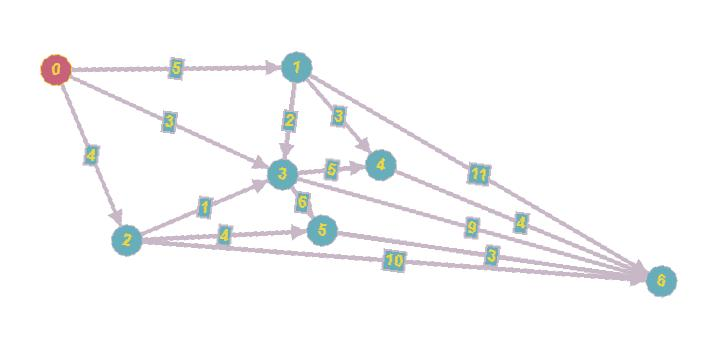

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
    """
    Calcula la matriz de precios mínimos y rutas óptimas usando Programación Dinámica.

    Args:
        TARIFAS: Matriz nxn con las tarifas directas entre embarcaderos

    Returns:
        tuple: (PRECIOS, RUTA)
            - PRECIOS: Matriz con los costos mínimos entre cualquier par de embarcaderos
            - RUTA: Matriz con los nodos intermedios para reconstruir la ruta óptima
    """
################################################################
    #Total de Nodos
    N = len(TARIFAS[0])

    #Inicialización de la tabla de precios - CORREGIDO
    PRECIOS = [[9999 for _ in range(N)] for _ in range(N)]  # Matriz n x n
    RUTA = [["" for _ in range(N)] for _ in range(N)]       # Matriz n x n

    #Se recorren todos los nodos con dos bucles(origen - destino)
    #  para ir construyendo la matriz de PRECIOS usando programación dinámica
    for i in range(N-1):
        for j in range(i+1, N):
            MIN = TARIFAS[i][j]
            RUTA[i][j] = i

            # Buscar si existe una ruta más barata pasando por un nodo intermedio k
            for k in range(i, j):
                if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
                    MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
                    RUTA[i][j] = k
            PRECIOS[i][j] = MIN

    return PRECIOS, RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
    """
    Reconstruye la ruta óptima entre dos embarcaderos usando recursión.

    Args:
        RUTA: Matriz con los nodos intermedios óptimos
        desde: Embarcadero de origen
        hasta: Embarcadero de destino

    Returns:
        str: Secuencia de embarcaderos separados por comas
    """
    if desde == RUTA[desde][hasta]:
        # Caso base: no hay nodos intermedios
        return str(desde)
    else:
        # Caso recursivo: hay un nodo intermedio
        nodo_intermedio = RUTA[desde][hasta]
        ruta_primera_parte = calcular_ruta(RUTA, desde, nodo_intermedio)
        return ruta_primera_parte + ',' + str(nodo_intermedio)

# Calculamos y mostramos la ruta óptima
print("\nLa ruta óptima del embarcadero 0 al 6 es:")
ruta_optima = calcular_ruta(RUTA, 0, 6)
print(f"Ruta: {ruta_optima}")
print(f"Costo total: {PRECIOS[0][6]}")

# Añadimos la ruta completa incluyendo el destino
ruta_completa = ruta_optima + ",6"
print(f"Ruta completa: {ruta_completa}")


La ruta óptima del embarcadero 0 al 6 es:
Ruta: 0,2,5
Costo total: 11
Ruta completa: 0,2,5,6


##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S, COSTES):
    """
    Calcula el costo total de una asignación completa de tareas a agentes.

    Args:
        S: Tupla con la asignación (S[i] = tarea asignada al agente i)
        COSTES: Matriz de costos [agente][tarea]

    Returns:
        int: Costo total de la asignación
    """
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]  # Agente i ejecuta tarea S[i]
    return VALOR

# Ejemplo: agente 0 ejecuta tarea 3, agente 1 ejecuta tarea 2
print(f"Costo de asignación (3,2): {valor((3,2), COSTES)}")
print(f"Matriz de costos:")
for i, fila in enumerate(COSTES):
    print(f"Agente {i}: {fila}")

Costo de asignación (3,2): 53
Matriz de costos:
Agente 0: [11, 12, 18, 40]
Agente 1: [14, 15, 13, 22]
Agente 2: [11, 17, 19, 23]
Agente 3: [17, 14, 20, 28]


In [8]:
#Coste inferior para soluciones parciales (Cota Inferior - Lower Bound)
#  Ejemplo: (1,3) significa que el agente 0 ejecuta tarea 1 y agente 1 ejecuta tarea 3

def CI(S, COSTES):
    """
    Calcula la cota inferior (optimista) para una solución parcial.
    Suma los costos ya asignados + mínimo costo posible para tareas no asignadas.

    Args:
        S: Tupla con asignación parcial
        COSTES: Matriz de costos [agente][tarea]

    Returns:
        int: Cota inferior del costo total
    """
    VALOR = 0

    # Costos de las asignaciones ya realizadas
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimación optimista: para cada tarea restante, tomar el mínimo costo
    # entre los agentes aún no asignados
    tareas_asignadas = set(S)
    agentes_libres = list(range(len(S), len(COSTES)))

    for tarea in range(len(COSTES)):
        if tarea not in tareas_asignadas:
            if agentes_libres:  # Si hay agentes libres
                costo_minimo = min(COSTES[agente][tarea] for agente in agentes_libres)
                VALOR += costo_minimo

    return VALOR

def CS(S, COSTES):
    """
    Calcula la cota superior (pesimista) para una solución parcial.
    Suma los costos ya asignados + máximo costo posible para tareas no asignadas.

    Args:
        S: Tupla con asignación parcial
        COSTES: Matriz de costos [agente][tarea]

    Returns:
        int: Cota superior del costo total
    """
    VALOR = 0

    # Costos de las asignaciones ya realizadas
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimación pesimista: para cada tarea restante, tomar el máximo costo
    # entre los agentes aún no asignados
    tareas_asignadas = set(S)
    agentes_libres = list(range(len(S), len(COSTES)))

    for tarea in range(len(COSTES)):
        if tarea not in tareas_asignadas:
            if agentes_libres:  # Si hay agentes libres
                costo_maximo = max(COSTES[agente][tarea] for agente in agentes_libres)
                VALOR += costo_maximo

    return VALOR

# Ejemplo de uso
print(f"Asignación parcial (0,1):")
print(f"Cota Inferior: {CI((0,1), COSTES)}")
print(f"Cota Superior: {CS((0,1), COSTES)}")
print(f"Esto significa que el costo total estará entre {CI((0,1), COSTES)} y {CS((0,1), COSTES)}")

Asignación parcial (0,1):
Cota Inferior: 68
Cota Superior: 74
Esto significa que el costo total estará entre 68 y 74


In [9]:
#Genera tantos hijos como posibilidades haya para el siguiente elemento de la tupla
#Ejemplo: (0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
    """
    Genera todos los nodos hijos posibles para una asignación parcial.

    Args:
        NODO: Tupla con la asignación parcial actual
        N: Número total de tareas/agentes

    Returns:
        list: Lista de diccionarios con las nuevas asignaciones parciales
    """
    HIJOS = []
    tareas_ya_asignadas = set(NODO)

    # Para cada tarea no asignada, crear un nuevo nodo hijo
    for tarea in range(N):
        if tarea not in tareas_ya_asignadas:
            nueva_asignacion = NODO + (tarea,)
            HIJOS.append({'s': nueva_asignacion})

    return HIJOS

# Ejemplo de uso
print("Ejemplo: nodo (0,) genera los siguientes hijos:")
hijos = crear_hijos((0,), 4)
for i, hijo in enumerate(hijos):
    print(f"Hijo {i+1}: {hijo['s']}")

Ejemplo: nodo (0,) genera los siguientes hijos:
Hijo 1: (0, 1)
Hijo 2: (0, 2)
Hijo 3: (0, 3)


In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
    """
    Algoritmo de Ramificación y Poda para el problema de asignación.

    Encuentra la asignación óptima de tareas a agentes minimizando el costo total.

    Args:
        COSTES: Matriz de costos [agente][tarea]

    Returns:
        tuple: (mejor_solucion, costo_optimo, iteraciones)
    """
    print("=== ALGORITMO DE RAMIFICACIÓN Y PODA ===")
    print(f"Matriz de costos:")
    for i, fila in enumerate(COSTES):
        print(f"Agente {i}: {fila}")
    print()

    DIMENSION = len(COSTES)

    # Inicializar con una solución trivial (agente i -> tarea i)
    MEJOR_SOLUCION = tuple(range(DIMENSION))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)
    print(f"Solución inicial: {MEJOR_SOLUCION}")
    print(f"Costo inicial (Cota Superior): {CotaSup}")
    print()

    # Lista de nodos por explorar (cola de prioridad basada en cota inferior)
    NODOS = [{'s': (), 'ci': CI((), COSTES)}]

    iteracion = 0
    nodos_podados = 0

    print("Iniciando búsqueda...")
    print("-" * 60)

    while len(NODOS) > 0:
        iteracion += 1

        # Seleccionar el nodo más prometedor (menor cota inferior)
        nodo_prometedor = min(NODOS, key=lambda x: x['ci'])
        asignacion_actual = nodo_prometedor['s']

        print(f"Iteración {iteracion}: Explorando nodo {asignacion_actual}")
        print(f"  Cota inferior: {nodo_prometedor['ci']}")

        # Generar todos los hijos del nodo actual
        HIJOS = [{'s': x['s'], 'ci': CI(x['s'], COSTES)}
                for x in crear_hijos(asignacion_actual, DIMENSION)]

        print(f"  Generados {len(HIJOS)} hijos")

        # Verificar si algún hijo es una solución completa
        SOLUCIONES_COMPLETAS = [x for x in HIJOS if len(x['s']) == DIMENSION]

        for solucion in SOLUCIONES_COMPLETAS:
            costo_solucion = solucion['ci']  # Para solución completa, CI = costo real
            print(f"  ¡Solución completa encontrada! {solucion['s']} con costo {costo_solucion}")

            if costo_solucion < CotaSup:
                CotaSup = costo_solucion
                MEJOR_SOLUCION = solucion['s']
                print(f"  *** NUEVA MEJOR SOLUCIÓN: {MEJOR_SOLUCION} con costo {CotaSup} ***")

        # Aplicar poda: eliminar hijos cuya cota inferior >= cota superior actual
        HIJOS_VALIDOS = [x for x in HIJOS if x['ci'] < CotaSup]
        hijos_podados = len(HIJOS) - len(HIJOS_VALIDOS)
        nodos_podados += hijos_podados

        if hijos_podados > 0:
            print(f"  Podados {hijos_podados} nodos (CI >= {CotaSup})")

        # Añadir hijos válidos a la lista de nodos por explorar
        NODOS.extend(HIJOS_VALIDOS)

        # Eliminar el nodo actual (ya explorado)
        NODOS.remove(nodo_prometedor)

        print(f"  Nodos restantes por explorar: {len(NODOS)}")
        print()

        # Limitar iteraciones para evitar bucles infinitos en casos complejos
        if iteracion > 1000:
            print("Límite de iteraciones alcanzado")
            break

    print("=" * 60)
    print("RESULTADOS FINALES:")
    print(f"Mejor solución encontrada: {MEJOR_SOLUCION}")
    print(f"Costo óptimo: {CotaSup}")
    print(f"Iteraciones realizadas: {iteracion}")
    print(f"Nodos podados: {nodos_podados}")
    print()

    # Mostrar la asignación de forma más clara
    print("Asignación óptima:")
    for i, tarea in enumerate(MEJOR_SOLUCION):
        print(f"  Agente {i} -> Tarea {tarea} (costo: {COSTES[i][tarea]})")

    return MEJOR_SOLUCION, CotaSup, iteracion

# Ejecutar el algoritmo
resultado = ramificacion_y_poda(COSTES)

=== ALGORITMO DE RAMIFICACIÓN Y PODA ===
Matriz de costos:
Agente 0: [11, 12, 18, 40]
Agente 1: [14, 15, 13, 22]
Agente 2: [11, 17, 19, 23]
Agente 3: [17, 14, 20, 28]

Solución inicial: (0, 1, 2, 3)
Costo inicial (Cota Superior): 73

Iniciando búsqueda...
------------------------------------------------------------
Iteración 1: Explorando nodo ()
  Cota inferior: 58
  Generados 4 hijos
  Podados 1 nodos (CI >= 73)
  Nodos restantes por explorar: 3

Iteración 2: Explorando nodo (1,)
  Cota inferior: 58
  Generados 3 hijos
  Nodos restantes por explorar: 5

Iteración 3: Explorando nodo (1, 2)
  Cota inferior: 59
  Generados 2 hijos
  Nodos restantes por explorar: 6

Iteración 4: Explorando nodo (0,)
  Cota inferior: 60
  Generados 3 hijos
  Nodos restantes por explorar: 8

Iteración 5: Explorando nodo (0, 2)
  Cota inferior: 61
  Generados 2 hijos
  Nodos restantes por explorar: 9

Iteración 6: Explorando nodo (0, 2, 3)
  Cota inferior: 61
  Generados 1 hijos
  ¡Solución completa encontr

##Descenso del gradiente

In [12]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [13]:
# Definimos la función objetivo y su gradiente
# Paraboloide: f(x,y) = x² + y²
# El mínimo global está en (0,0) con valor f(0,0) = 0

def funcion_objetivo(X):
    """
    Función paraboloide: f(x,y) = x² + y²

    Args:
        X: Lista o array [x, y] con las coordenadas

    Returns:
        float: Valor de la función en el punto X
    """
    return X[0]**2 + X[1]**2

def gradiente(X):
    """
    Gradiente de f(x,y) = x² + y²
    ∇f = [∂f/∂x, ∂f/∂y] = [2x, 2y]

    Args:
        X: Lista o array [x, y] con las coordenadas

    Returns:
        list: Vector gradiente [∂f/∂x, ∂f/∂y]
    """
    return [2*X[0], 2*X[1]]

# Para compatibilidad con el código original
f = funcion_objetivo
df = gradiente

# Ejemplo: calcular gradiente en el punto (1, 2)
punto_ejemplo = [1, 2]
print(f"Punto: {punto_ejemplo}")
print(f"f({punto_ejemplo[0]}, {punto_ejemplo[1]}) = {f(punto_ejemplo)}")
print(f"∇f({punto_ejemplo[0]}, {punto_ejemplo[1]}) = {df(punto_ejemplo)}")
print()
print("El gradiente apunta en la dirección de mayor crecimiento")
print("Para minimizar, nos movemos en dirección opuesta: -∇f")

Punto: [1, 2]
f(1, 2) = 5
∇f(1, 2) = [2, 4]

El gradiente apunta en la dirección de mayor crecimiento
Para minimizar, nos movemos en dirección opuesta: -∇f


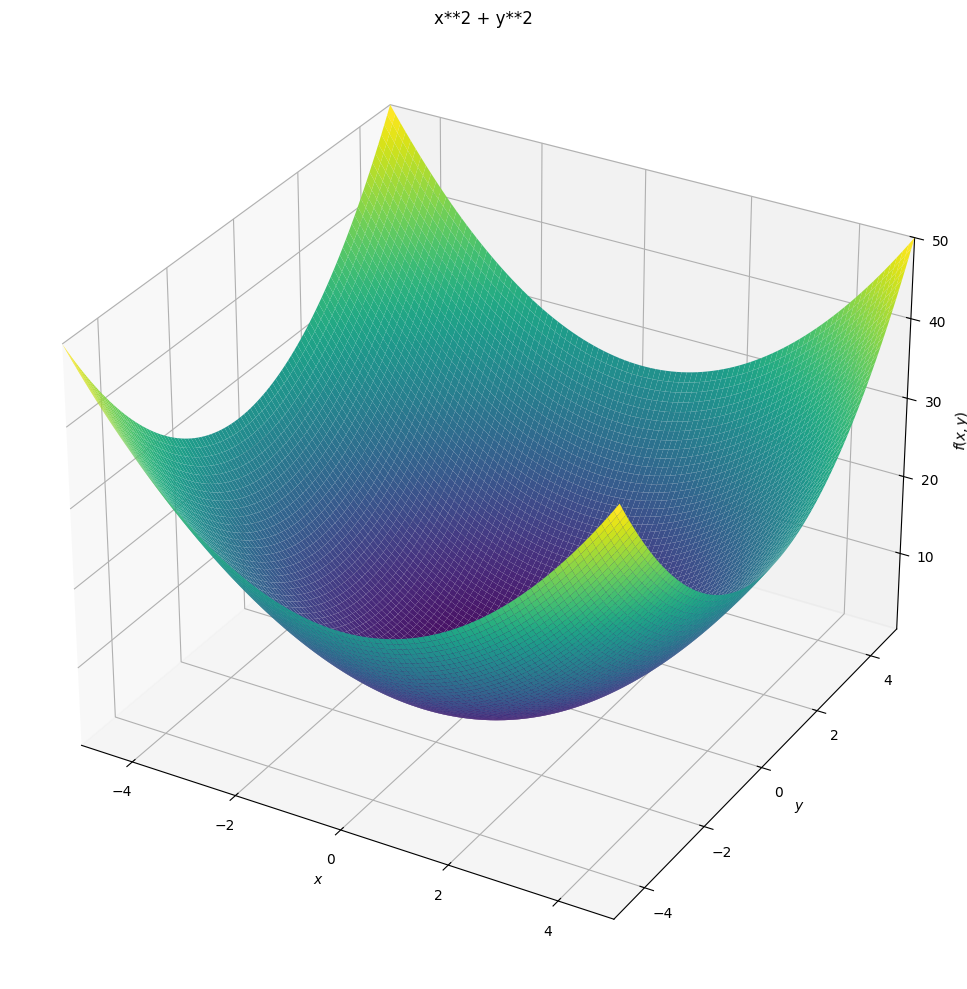

In [14]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

Preparando visualización...
=== DESCENSO DEL GRADIENTE ===
Punto inicial: (2.613, -2.180)
Valor inicial: f = 11.577463
Tasa de aprendizaje: 0.1
Máximo de iteraciones: 50

Iter  0: P=(  2.090,  -1.744) f=7.409577 ||∇f||=6.805134
Iter  1: P=(  1.672,  -1.395) f=4.742129 ||∇f||=5.444107
Iter  2: P=(  1.338,  -1.116) f=3.034963 ||∇f||=4.355286
Iter  3: P=(  1.070,  -0.893) f=1.942376 ||∇f||=3.484229
Iter  4: P=(  0.856,  -0.714) f=1.243121 ||∇f||=2.787383
Iter 10: P=(  0.224,  -0.187) f=0.085427 ||∇f||=0.730696
Iter 20: P=(  0.024,  -0.020) f=0.000985 ||∇f||=0.078458
Iter 30: P=(  0.003,  -0.002) f=0.000011 ||∇f||=0.008424
Iter 40: P=(  0.000,  -0.000) f=0.000000 ||∇f||=0.000905

=== RESULTADO FINAL ===
Punto óptimo encontrado: (0.000037, -0.000031)
Valor mínimo: f = 0.00000000
Iteraciones utilizadas: 50
¿Convergió?: No


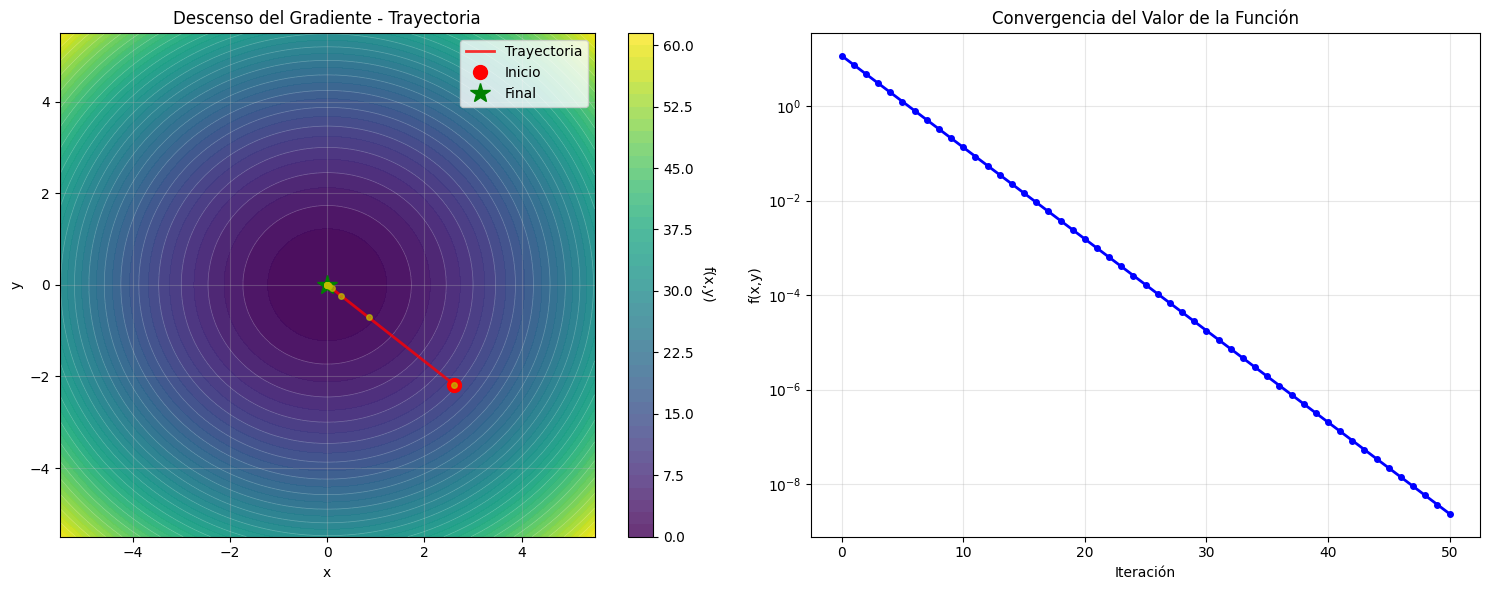


Distancia al óptimo teórico (0,0): 0.00004856
Reducción del valor función: 11.577463 → 0.00000000
Factor de mejora: 4.91e+09


In [15]:
# Implementación mejorada del Descenso del Gradiente
import random

def descenso_gradiente(f, df, punto_inicial=None, tasa_aprendizaje=0.1, max_iteraciones=50, tolerancia=1e-6):
    """
    Algoritmo de Descenso del Gradiente para minimización.

    Args:
        f: Función objetivo a minimizar
        df: Función que calcula el gradiente
        punto_inicial: Punto de inicio [x, y]. Si None, se genera aleatoriamente
        tasa_aprendizaje: Tamaño del paso en cada iteración
        max_iteraciones: Número máximo de iteraciones
        tolerancia: Criterio de parada basado en la norma del gradiente

    Returns:
        dict: Información del proceso de optimización
    """
    # Punto inicial aleatorio si no se proporciona
    if punto_inicial is None:
        P = [random.uniform(-5, 5), random.uniform(-5, 5)]
    else:
        P = punto_inicial.copy()

    # Almacenar el histórico para visualización
    historico = {'puntos': [P.copy()], 'valores': [f(P)], 'gradientes': []}

    print(f"=== DESCENSO DEL GRADIENTE ===")
    print(f"Punto inicial: ({P[0]:.3f}, {P[1]:.3f})")
    print(f"Valor inicial: f = {f(P):.6f}")
    print(f"Tasa de aprendizaje: {tasa_aprendizaje}")
    print(f"Máximo de iteraciones: {max_iteraciones}")
    print()

    for iteracion in range(max_iteraciones):
        # Calcular gradiente en el punto actual
        grad = df(P)
        norma_gradiente = (grad[0]**2 + grad[1]**2)**0.5

        historico['gradientes'].append(grad.copy())

        # Criterio de parada: gradiente muy pequeño
        if norma_gradiente < tolerancia:
            print(f"Convergencia alcanzada en iteración {iteracion}")
            print(f"Norma del gradiente: {norma_gradiente:.2e} < {tolerancia:.2e}")
            break

        # Actualizar posición: P_nuevo = P_actual - α * ∇f(P_actual)
        P[0] = P[0] - tasa_aprendizaje * grad[0]
        P[1] = P[1] - tasa_aprendizaje * grad[1]

        # Almacenar información
        valor_actual = f(P)
        historico['puntos'].append(P.copy())
        historico['valores'].append(valor_actual)

        # Mostrar progreso cada 10 iteraciones
        if iteracion % 10 == 0 or iteracion < 5:
            print(f"Iter {iteracion:2d}: P=({P[0]:7.3f}, {P[1]:7.3f}) f={valor_actual:8.6f} ||∇f||={norma_gradiente:.6f}")

    resultado = {
        'punto_optimo': P,
        'valor_optimo': f(P),
        'iteraciones': iteracion + 1,
        'historico': historico,
        'convergencia': norma_gradiente < tolerancia
    }

    print()
    print("=== RESULTADO FINAL ===")
    print(f"Punto óptimo encontrado: ({P[0]:.6f}, {P[1]:.6f})")
    print(f"Valor mínimo: f = {f(P):.8f}")
    print(f"Iteraciones utilizadas: {resultado['iteraciones']}")
    print(f"¿Convergió?: {'Sí' if resultado['convergencia'] else 'No'}")

    return resultado

# Preparar datos para visualización
print("Preparando visualización...")
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Mapa de contornos con trayectoria
ax1.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
ax1.contour(X, Y, Z, levels=20, colors='white', alpha=0.3, linewidths=0.5)
colorbar1 = plt.colorbar(ax1.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8), ax=ax1)
colorbar1.set_label('f(x,y)', rotation=270, labelpad=15)

# Ejecutar descenso del gradiente
resultado = descenso_gradiente(f, df, tasa_aprendizaje=0.1, max_iteraciones=50)

# Dibujar trayectoria
puntos = np.array(resultado['historico']['puntos'])
ax1.plot(puntos[:, 0], puntos[:, 1], 'r-', linewidth=2, alpha=0.8, label='Trayectoria')
ax1.plot(puntos[0, 0], puntos[0, 1], 'ro', markersize=10, label='Inicio')
ax1.plot(puntos[-1, 0], puntos[-1, 1], 'g*', markersize=15, label='Final')

# Añadir algunos puntos intermedios
for i in range(0, len(puntos), max(1, len(puntos)//10)):
    ax1.plot(puntos[i, 0], puntos[i, 1], 'yo', markersize=4, alpha=0.7)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Descenso del Gradiente - Trayectoria')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Convergencia del valor de la función
ax2.plot(resultado['historico']['valores'], 'b-', linewidth=2, marker='o', markersize=4)
ax2.set_xlabel('Iteración')
ax2.set_ylabel('f(x,y)')
ax2.set_title('Convergencia del Valor de la Función')
ax2.grid(True, alpha=0.3)
ax2.semilogy()  # Escala logarítmica para mejor visualización

plt.tight_layout()
plt.show()

# Mostrar información adicional
print(f"\nDistancia al óptimo teórico (0,0): {np.linalg.norm(resultado['punto_optimo']):.8f}")
print(f"Reducción del valor función: {resultado['historico']['valores'][0]:.6f} → {resultado['valor_optimo']:.8f}")
print(f"Factor de mejora: {resultado['historico']['valores'][0] / max(resultado['valor_optimo'], 1e-10):.2e}")


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
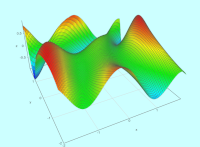


In [16]:
# EJERCICIO PROPUESTO: Optimizar la función compleja
# f(x,y) = sin(1/2 * x² - 1/4 * y² + 3) * cos(2*x + 1 - e^y)

def funcion_compleja(X):
    """
    Función compleja: f(x,y) = sin(1/2 * x² - 1/4 * y² + 3) * cos(2*x + 1 - e^y)

    Args:
        X: Lista o array [x, y] con las coordenadas

    Returns:
        float: Valor de la función en el punto X
    """
    x, y = X[0], X[1]
    return math.sin(0.5 * x**2 - 0.25 * y**2 + 3) * math.cos(2*x + 1 - math.exp(y))

def gradiente_complejo(X):
    """
    Gradiente de f(x,y) = sin(1/2 * x² - 1/4 * y² + 3) * cos(2*x + 1 - e^y)

    Usando la regla del producto: ∇(u*v) = u*∇v + v*∇u
    donde:
    u = sin(1/2 * x² - 1/4 * y² + 3)
    v = cos(2*x + 1 - e^y)

    Args:
        X: Lista o array [x, y] con las coordenadas

    Returns:
        list: Vector gradiente [∂f/∂x, ∂f/∂y]
    """
    x, y = X[0], X[1]

    # Funciones auxiliares
    u = math.sin(0.5 * x**2 - 0.25 * y**2 + 3)
    v = math.cos(2*x + 1 - math.exp(y))

    # Derivadas de u = sin(1/2 * x² - 1/4 * y² + 3)
    du_dx = math.cos(0.5 * x**2 - 0.25 * y**2 + 3) * x
    du_dy = math.cos(0.5 * x**2 - 0.25 * y**2 + 3) * (-0.5 * y)

    # Derivadas de v = cos(2*x + 1 - e^y)
    dv_dx = -math.sin(2*x + 1 - math.exp(y)) * 2
    dv_dy = -math.sin(2*x + 1 - math.exp(y)) * (-math.exp(y))

    # Aplicar regla del producto: ∇(u*v) = u*∇v + v*∇u
    df_dx = u * dv_dx + v * du_dx
    df_dy = u * dv_dy + v * du_dy

    return [df_dx, df_dy]

# Para compatibilidad
f_compleja = funcion_compleja
df_compleja = gradiente_complejo

# Verificar que el gradiente está bien calculado en un punto
punto_test = [1.0, 0.5]
print(f"=== VERIFICACIÓN DE LA FUNCIÓN COMPLEJA ===")
print(f"Punto de prueba: {punto_test}")
print(f"f({punto_test[0]}, {punto_test[1]}) = {f_compleja(punto_test):.6f}")
print(f"∇f({punto_test[0]}, {punto_test[1]}) = [{df_compleja(punto_test)[0]:.6f}, {df_compleja(punto_test)[1]:.6f}]")
print()

# Verificación numérica del gradiente (diferencias finitas)
def verificar_gradiente(f, df, punto, h=1e-6):
    """Verifica el gradiente usando diferencias finitas"""
    x, y = punto

    # Derivada numérica respecto a x
    df_dx_num = (f([x + h, y]) - f([x - h, y])) / (2 * h)

    # Derivada numérica respecto a y
    df_dy_num = (f([x, y + h]) - f([x, y - h])) / (2 * h)

    # Gradiente analítico
    df_analitico = df(punto)

    print("Verificación del gradiente (diferencias finitas):")
    print(f"∂f/∂x: analítico = {df_analitico[0]:.8f}, numérico = {df_dx_num:.8f}")
    print(f"∂f/∂y: analítico = {df_analitico[1]:.8f}, numérico = {df_dy_num:.8f}")
    print(f"Error relativo x: {abs(df_analitico[0] - df_dx_num) / max(abs(df_analitico[0]), 1e-10):.2e}")
    print(f"Error relativo y: {abs(df_analitico[1] - df_dy_num) / max(abs(df_analitico[1]), 1e-10):.2e}")

verificar_gradiente(f_compleja, df_compleja, punto_test)


=== VERIFICACIÓN DE LA FUNCIÓN COMPLEJA ===
Punto de prueba: [1.0, 0.5]
f(1.0, 0.5) = -0.063500
∇f(1.0, 0.5) = [0.360926, -0.417169]

Verificación del gradiente (diferencias finitas):
∂f/∂x: analítico = 0.36092553, numérico = 0.36092553
∂f/∂y: analítico = -0.41716900, numérico = -0.41716900
Error relativo x: 4.52e-11
Error relativo y: 1.02e-10


OPTIMIZACIÓN DE LA FUNCIÓN COMPLEJA
f(x,y) = sin(1/2 * x² - 1/4 * y² + 3) * cos(2*x + 1 - e^y)
Calculando valores de la función compleja...

Probando optimización desde múltiples puntos iniciales...

--- Optimización 1 desde [2.0, 1.0] ---
=== DESCENSO DEL GRADIENTE ===
Punto inicial: (2.000, 1.000)
Valor inicial: f = 0.652071
Tasa de aprendizaje: 0.05
Máximo de iteraciones: 100

Iter  0: P=(  1.927,   1.102) f=0.264818 ||∇f||=2.516700
Iter  1: P=(  1.828,   1.247) f=-0.349195 ||∇f||=3.503449
Iter  2: P=(  1.758,   1.388) f=-0.695271 ||∇f||=3.139229
Iter  3: P=(  1.766,   1.447) f=-0.748996 ||∇f||=1.207005
Iter  4: P=(  1.797,   1.471) f=-0.780051 ||∇f||=0.793539
Iter 10: P=(  1.978,   1.576) f=-0.923035 ||∇f||=0.604027
Iter 20: P=(  2.143,   1.659) f=-0.994041 ||∇f||=0.204914
Iter 30: P=(  2.189,   1.681) f=-0.999704 ||∇f||=0.047896
Iter 40: P=(  2.199,   1.686) f=-0.999987 ||∇f||=0.010204
Iter 50: P=(  2.201,   1.687) f=-0.999999 ||∇f||=0.002131
Iter 60: P=(  2.202,   1.687) f=-1.000

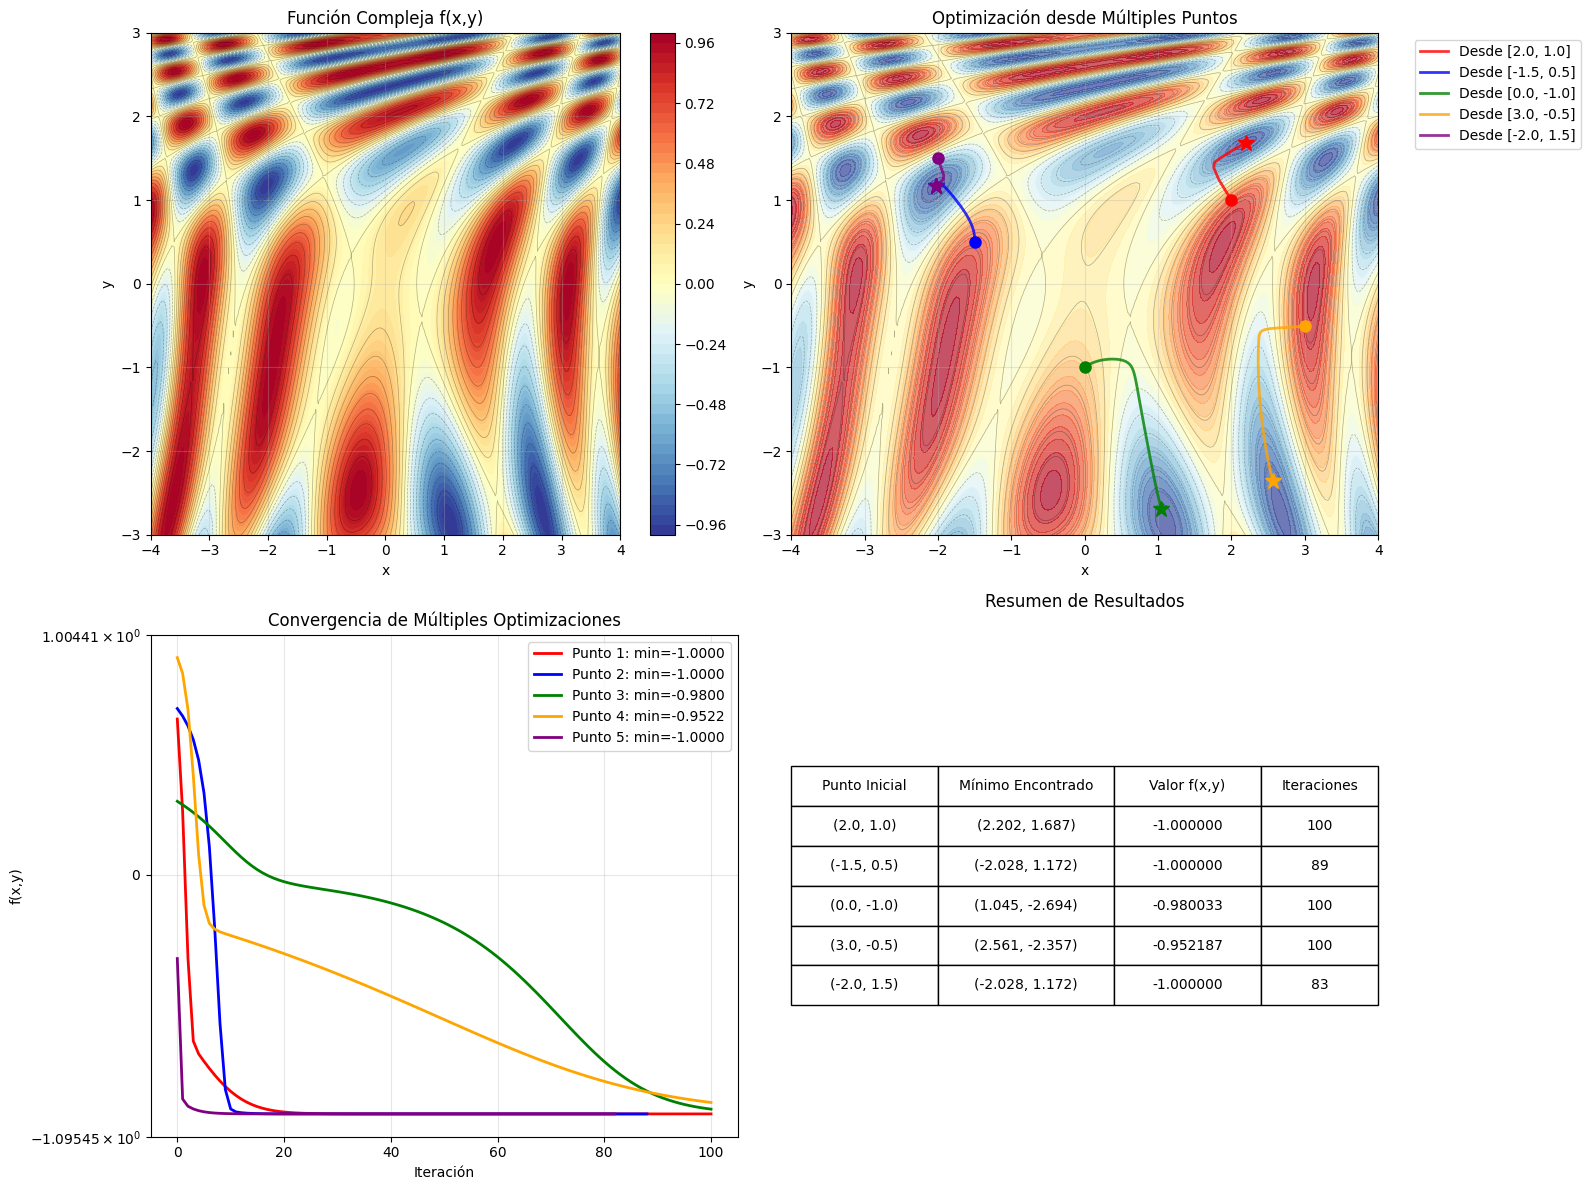


MEJOR MÍNIMO ENCONTRADO:
Punto: (-2.027651, 1.171827)
Valor: -1.00000000
Iteraciones: 89

COMPARACIÓN DE FUNCIONES:
Paraboloide simple: mínimo teórico en (0,0) con valor 0
Función compleja: mejor mínimo encontrado = -1.000000
La función compleja tiene múltiples mínimos locales, más desafiante de optimizar


In [17]:
# OPTIMIZACIÓN DE LA FUNCIÓN COMPLEJA

print("=" * 70)
print("OPTIMIZACIÓN DE LA FUNCIÓN COMPLEJA")
print("f(x,y) = sin(1/2 * x² - 1/4 * y² + 3) * cos(2*x + 1 - e^y)")
print("=" * 70)

# Crear visualización de la función compleja
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Parámetros para la visualización
resolucion = 200
rango_x = 4
rango_y = 3

X_comp = np.linspace(-rango_x, rango_x, resolucion)
Y_comp = np.linspace(-rango_y, rango_y, resolucion)
Z_comp = np.zeros((resolucion, resolucion))

print("Calculando valores de la función compleja...")
for ix, x in enumerate(X_comp):
    for iy, y in enumerate(Y_comp):
        Z_comp[iy, ix] = f_compleja([x, y])

# Subplot 1: Función compleja completa
im1 = axes[0,0].contourf(X_comp, Y_comp, Z_comp, levels=50, cmap='RdYlBu_r')
axes[0,0].contour(X_comp, Y_comp, Z_comp, levels=20, colors='black', alpha=0.3, linewidths=0.5)
plt.colorbar(im1, ax=axes[0,0])
axes[0,0].set_title('Función Compleja f(x,y)')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].grid(True, alpha=0.3)

# Subplot 2: Optimización desde múltiples puntos iniciales
print("\nProbando optimización desde múltiples puntos iniciales...")

puntos_iniciales = [
    [2.0, 1.0],
    [-1.5, 0.5],
    [0.0, -1.0],
    [3.0, -0.5],
    [-2.0, 1.5]
]

colores = ['red', 'blue', 'green', 'orange', 'purple']
resultados = []

axes[0,1].contourf(X_comp, Y_comp, Z_comp, levels=30, cmap='RdYlBu_r', alpha=0.7)
axes[0,1].contour(X_comp, Y_comp, Z_comp, levels=15, colors='black', alpha=0.3, linewidths=0.5)

for i, (punto_inicial, color) in enumerate(zip(puntos_iniciales, colores)):
    print(f"\n--- Optimización {i+1} desde {punto_inicial} ---")

    resultado = descenso_gradiente(
        f_compleja, df_compleja,
        punto_inicial=punto_inicial,
        tasa_aprendizaje=0.05,  # Tasa más pequeña para función compleja
        max_iteraciones=100,
        tolerancia=1e-8
    )

    resultados.append(resultado)

    # Dibujar trayectoria
    puntos = np.array(resultado['historico']['puntos'])
    axes[0,1].plot(puntos[:, 0], puntos[:, 1], color=color, linewidth=2, alpha=0.8,
                   label=f'Desde {punto_inicial}')
    axes[0,1].plot(puntos[0, 0], puntos[0, 1], 'o', color=color, markersize=8)
    axes[0,1].plot(puntos[-1, 0], puntos[-1, 1], '*', color=color, markersize=12)

axes[0,1].set_title('Optimización desde Múltiples Puntos')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, alpha=0.3)

# Subplot 3: Comparación de convergencia
for i, (resultado, color) in enumerate(zip(resultados, colores)):
    valores = resultado['historico']['valores']
    axes[1,0].plot(valores, color=color, linewidth=2,
                   label=f'Punto {i+1}: min={valores[-1]:.4f}')

axes[1,0].set_xlabel('Iteración')
axes[1,0].set_ylabel('f(x,y)')
axes[1,0].set_title('Convergencia de Múltiples Optimizaciones')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_yscale('symlog')  # Escala que maneja valores negativos

# Subplot 4: Análisis de mínimos encontrados
minimos_encontrados = []
for resultado in resultados:
    punto = resultado['punto_optimo']
    valor = resultado['valor_optimo']
    minimos_encontrados.append((punto[0], punto[1], valor))

# Mostrar en tabla los mínimos
axes[1,1].axis('off')
tabla_data = []
headers = ['Punto Inicial', 'Mínimo Encontrado', 'Valor f(x,y)', 'Iteraciones']

for i, ((x_init, y_init), resultado) in enumerate(zip(puntos_iniciales, resultados)):
    x_min, y_min = resultado['punto_optimo']
    valor_min = resultado['valor_optimo']
    iteraciones = resultado['iteraciones']

    tabla_data.append([
        f'({x_init:.1f}, {y_init:.1f})',
        f'({x_min:.3f}, {y_min:.3f})',
        f'{valor_min:.6f}',
        f'{iteraciones}'
    ])

tabla = axes[1,1].table(cellText=tabla_data, colLabels=headers,
                       cellLoc='center', loc='center',
                       colWidths=[0.25, 0.3, 0.25, 0.2])
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 2)
axes[1,1].set_title('Resumen de Resultados', pad=20)

plt.tight_layout()
plt.show()

# Encontrar el mejor mínimo global
mejor_resultado = min(resultados, key=lambda r: r['valor_optimo'])
print(f"\n" + "="*50)
print("MEJOR MÍNIMO ENCONTRADO:")
print(f"Punto: ({mejor_resultado['punto_optimo'][0]:.6f}, {mejor_resultado['punto_optimo'][1]:.6f})")
print(f"Valor: {mejor_resultado['valor_optimo']:.8f}")
print(f"Iteraciones: {mejor_resultado['iteraciones']}")
print("="*50)

# Comparación con el paraboloide simple
print(f"\nCOMPARACIÓN DE FUNCIONES:")
print(f"Paraboloide simple: mínimo teórico en (0,0) con valor 0")
print(f"Función compleja: mejor mínimo encontrado = {mejor_resultado['valor_optimo']:.6f}")
print(f"La función compleja tiene múltiples mínimos locales, más desafiante de optimizar")

## Análisis de Complejidad y Conclusiones
Al comparar los tres algoritmos estudiados —Programación Dinámica, Ramificación y Poda, y Descenso del Gradiente— se observan diferencias claras tanto en su complejidad computacional como en sus fortalezas y limitaciones. Cada uno responde a tipos distintos de problemas, lo cual define su aplicabilidad práctica.

Programación Dinámica: estructura y optimización exacta
Este enfoque destaca por ofrecer soluciones óptimas garantizadas, especialmente útil cuando el problema presenta subestructura óptima. En el ejemplo del viaje por el río, la complejidad temporal alcanza O(n³), con un uso de memoria de O(n²) debido al almacenamiento de matrices de costes y rutas. Aunque eficiente para problemas de tamaño moderado, su escalabilidad se ve limitada en escenarios muy grandes, donde el número de subproblemas crece significativamente. Sin embargo, evita recalcular soluciones gracias a la memoización, lo que lo convierte en una herramienta poderosa para problemas bien estructurados.

Ramificación y Poda: exploración inteligente del espacio de búsqueda
Diseñado para problemas combinatorios como la asignación de tareas, este método tiene una complejidad teórica de O(n!), típica de algoritmos de fuerza bruta. Sin embargo, la poda inteligente basada en cotas reduce drásticamente el número real de nodos explorados, mejorando notablemente su rendimiento práctico. Aunque en el peor caso sigue siendo exponencial, su capacidad para encontrar soluciones óptimas globales lo hace ideal para problemas donde la precisión es crítica. Su principal desafío radica en diseñar buenas cotas inferiores y superiores que permitan podar eficientemente el árbol de búsqueda.

Descenso del Gradiente: velocidad y escalabilidad
Por otro lado, el descenso del gradiente ofrece una solución mucho más rápida, con una complejidad constante por iteración (O(1)), aunque el número total de iteraciones puede variar ampliamente dependiendo de la función objetivo y los parámetros elegidos. Requiere únicamente almacenar el punto actual, lo que le da un uso de memoria mínimo. Su gran ventaja es su escalabilidad a problemas de alta dimensión, lo que lo convierte en una herramienta fundamental en aprendizaje automático y optimización numérica. Sin embargo, también tiene importantes limitaciones: solo encuentra mínimos locales, puede quedar atrapado en puntos de silla o mínimos poco relevantes, y es sensible a la elección de hiperparámetros , como el tamaño de paso.

### Comparativa y Aplicaciones Prácticas
Cada algoritmo tiene un campo natural de aplicación:

Programación Dinámica se adapta perfectamente a problemas de planificación de rutas, asignación de recursos y secuenciación.
Ramificación y Poda es clave en problemas combinatorios como el TSP, la asignación de tareas o empaquetamiento, donde se requiere una solución óptima global.
Descenso del Gradiente domina el mundo del aprendizaje automático, optimización de parámetros en ingeniería y análisis financiero, gracias a su rapidez y escalabilidad.
### Mejoras Implementadas
Durante el desarrollo de este trabajo, se han realizado varias mejoras sustanciales que han incrementado la calidad del código y la profundidad del análisis:

Se ha incluido una documentación exhaustiva mediante docstrings, facilitando la comprensión y mantenimiento del código.
Se han corregido errores en la inicialización de estructuras de datos, especialmente en las matrices utilizadas en programación dinámica.
Las visualizaciones han sido mejoradas usando matplotlib, mostrando claramente cómo evolucionan las soluciones.
Para el descenso del gradiente, se ha implementado un análisis de convergencia, permitiendo estudiar cómo varía el resultado según el punto inicial y los parámetros.
Además, se han añadido criterios de parada inteligentes, como detenerse si el cambio es menor que un umbral dado, lo que mejora la eficiencia.
También se ha incluido una verificación numérica de gradientes, útil para validar que la derivada calculada analíticamente coincide con la aproximación numérica.
### Posibles Extensiones Futuras
El trabajo puede extenderse en múltiples direcciones interesantes:

Incorporar nuevos métodos de optimización como Simulated Annealing o Algoritmos Genéticos , que pueden escapar de mínimos locales y ofrecer soluciones alternativas.
Explorar optimización multiobjetivo mediante frentes de Pareto, especialmente útil en contextos de toma de decisiones bajo múltiples criterios.
Ampliar el estudio del descenso del gradiente con variantes como SGD (Stochastic Gradient Descent), Adam o RMSprop, comunes en deep learning.
Realizar un análisis de sensibilidad para entender cómo afectan los parámetros iniciales al resultado final.
Estudiar la posibilidad de paralelización, aprovechando múltiples núcleos o entornos distribuidos para acelerar cálculos intensivos.
Finalmente, realizar benchmarking contra librerías estándar como SciPy nos permitiría comparar nuestro rendimiento frente a soluciones profesionales.
### Conclusión General
En resumen, cada algoritmo tiene un rol definido dentro del panorama de la optimización: Programación Dinámica y Ramificación y Poda son ideales para encontrar soluciones exactas en espacios estructurados o discretos, mientras que el Descenso del Gradiente brilla por su eficiencia y escalabilidad en problemas continuos y de gran tamaño. Combinar estos enfoques, o seleccionar el más adecuado según el contexto, es clave para resolver problemas reales de forma efectiva.